In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.6952 - val_loss: 0.6950
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.6950 - val_loss: 0.6948
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.6948 - val_loss: 0.6946
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.6946 - val_loss: 0.6944
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.6943 - val_loss: 0.6941


In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 32
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Adding an additional hidden layer
hidden_layer_dim = 64
hidden_layer = Dense(hidden_layer_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input, now connected to the hidden layer instead of 'encoded'
decoded = Dense(784, activation='sigmoid')(hidden_layer)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load and prepare the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.6953 - val_loss: 0.6951
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.6950 - val_loss: 0.6948
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.6948 - val_loss: 0.6946
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.6946 - val_loss: 0.6944
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.6944 - val_loss: 0.6942


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.6940 - val_loss: 0.6938
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6934 - val_loss: 0.6933
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


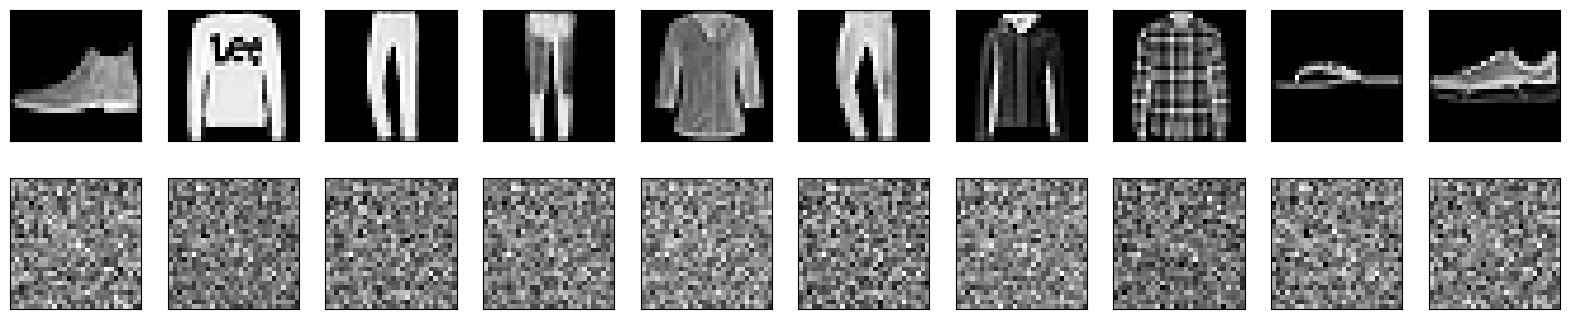

In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Define the model architecture
encoding_dim = 32
hidden_layer_dim = 64

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
hidden_layer = Dense(hidden_layer_dim, activation='relu')(encoded)  # Additional hidden layer
decoded = Dense(784, activation='sigmoid')(hidden_layer)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load and prepare data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Predict on the test data
decoded_imgs = autoencoder.predict(x_test)

# Visualize the original and reconstructed data
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6964 - val_loss: 0.6962
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.6961 - val_loss: 0.6959
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.6958 - val_loss: 0.6956
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.6955 - val_loss: 0.6953
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.6952 - val_loss: 0.6950
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6950 - val_loss: 0.6947
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6947 - val_loss: 0.6945
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6945 - val_loss: 0.6943
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.6942 - val_loss: 0.6940
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.6940 - val_loss: 0.6938
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6938 - val_loss: 0.6936
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

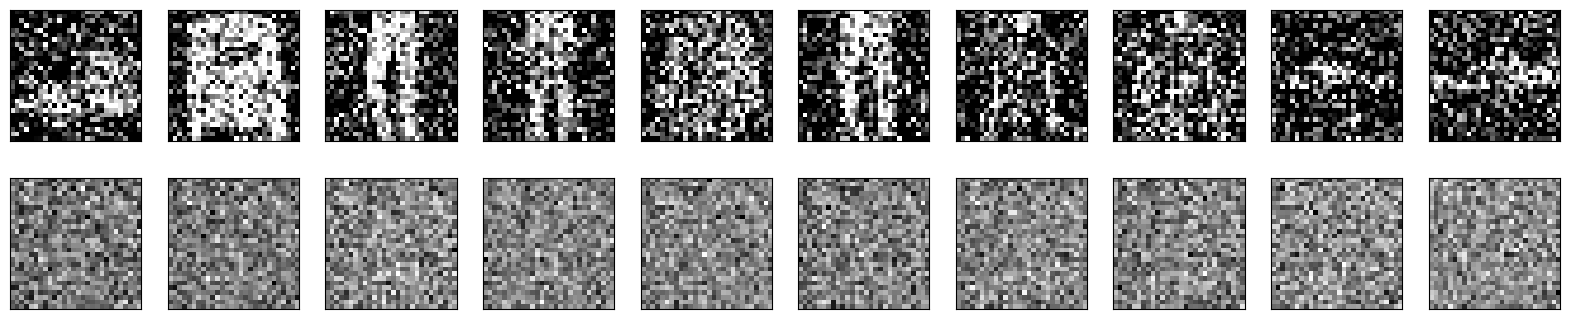

In [4]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Define the model architecture
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
# Load data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# Introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the model
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Predict on the noisy test data
decoded_imgs = autoencoder.predict(x_test_noisy)
# Visualize the noisy input and the reconstructed data
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy input
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7123 - loss: 0.8631 - val_accuracy: 0.8315 - val_loss: 0.4876
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8483 - loss: 0.4443 - val_accuracy: 0.8517 - val_loss: 0.4280
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8646 - loss: 0.3898 - val_accuracy: 0.8547 - val_loss: 0.4191
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8701 - loss: 0.3716 - val_accuracy: 0.8584 - val_loss: 0.4002
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8773 - loss: 0.3448 - val_accuracy: 0.8653 - val_loss: 0.3756
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8827 - loss: 0.3310 - val_accuracy: 0.8668 - val_loss: 0.3715
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8902 - loss: 0.3117 - val_accuracy: 0.8707 - val_loss: 0.3653
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8901 - loss: 0.3065 - val_accuracy: 0

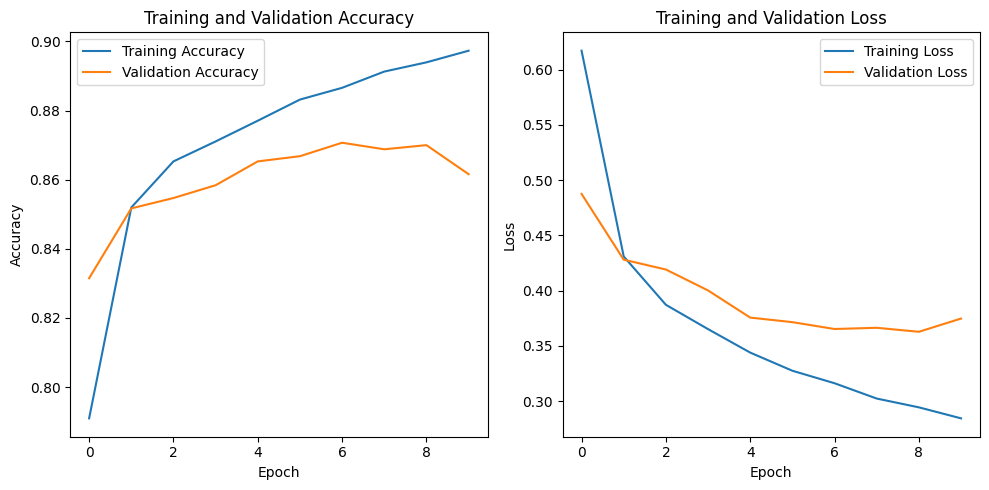

In [5]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam

# Load and prepare the Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255

# Convert labels to one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Model architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(10, activation='softmax')(encoded)  # Classification layer

model = Model(input_img, decoded)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, y_test))

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()